# Part A

In [1]:
# exploratory data analysis (eda)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset and display basic information
df = pd.read_csv("dataset/cardekho.csv")

print("first 5 rows of dataset:")
print(df.head())

print("\ndataset information:")
print(df.info())

first 5 rows of dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3      

In [2]:
# # 2. compute summary statistics
# print("\nsummary statistics:")
print(df.describe())


              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine        seats  
count  7907.000000  7907.000000  
mean   1458.625016     5.416719  
std     503.916303     0.959588  
min     624.000000     2.000000  
25%    1197.000000     5.000000  
50%    1248.000000     5.000000  
75%    1582.000000     5.000000  
max    3604.000000    14.000000  


In [3]:
# 3. check missing values
print("\nmissing values in each column:")
print(df.isnull().sum())

# check outliers using iqr method for numeric columns
print("\noutlier detection using iqr method:")
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


missing values in each column:
name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

outlier detection using iqr method:
year: 81 outliers
selling_price: 600 outliers
km_driven: 170 outliers
mileage(km/ltr/kg): 24 outliers
engine: 1183 outliers
seats: 1653 outliers


In [4]:
# 3.5 Drop missing values and let outliers stay
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce') # Convert max_power to numeric
df = df.dropna()
df = df.drop(['name'], axis=1)
df = pd.get_dummies(df, drop_first=True) # Convert categorical data to numeric
df_copy = df.copy()

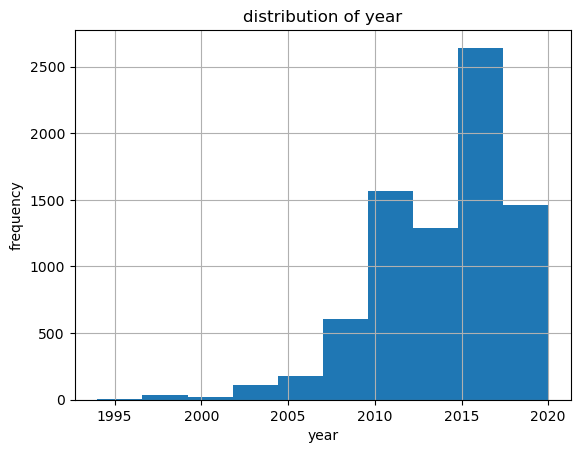

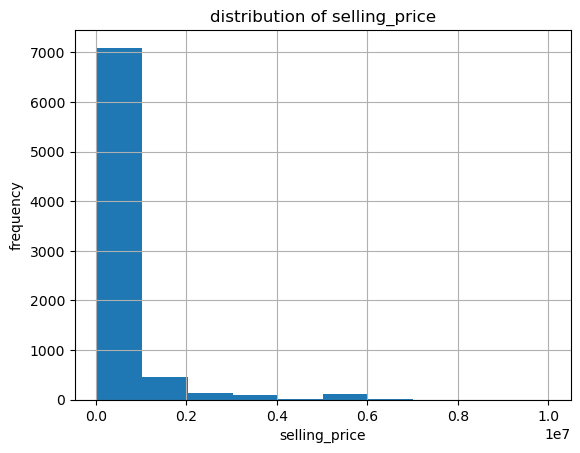

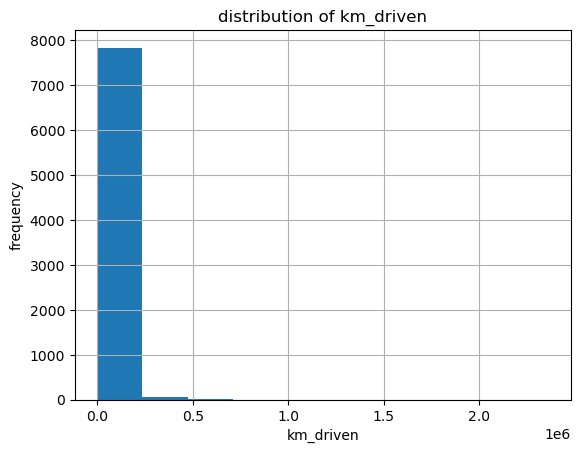

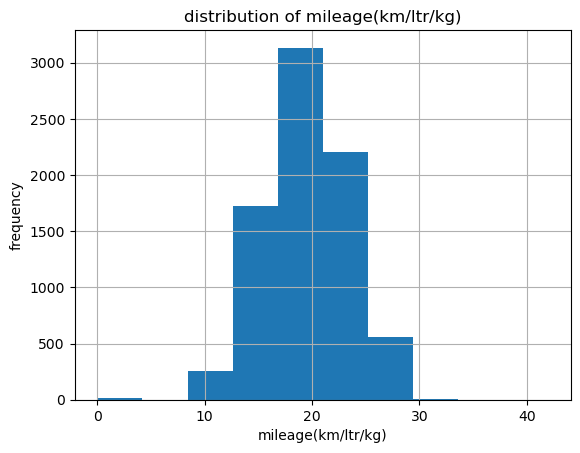

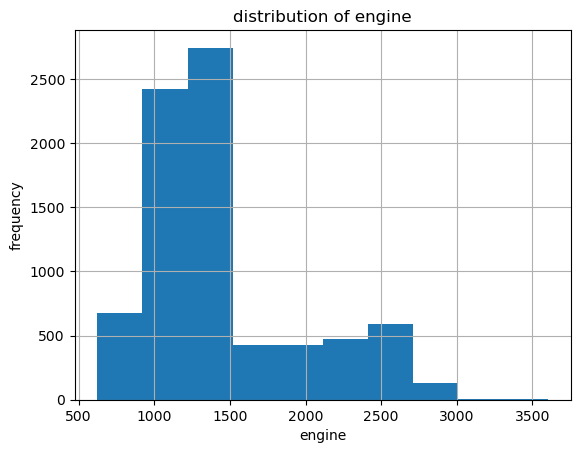

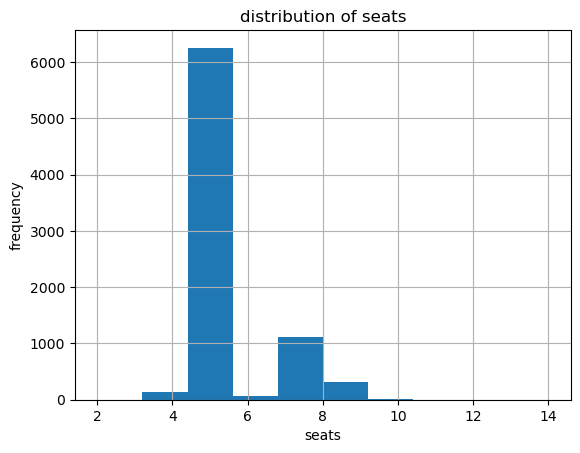

In [5]:
# 4. plot feature distributions (histograms)
for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

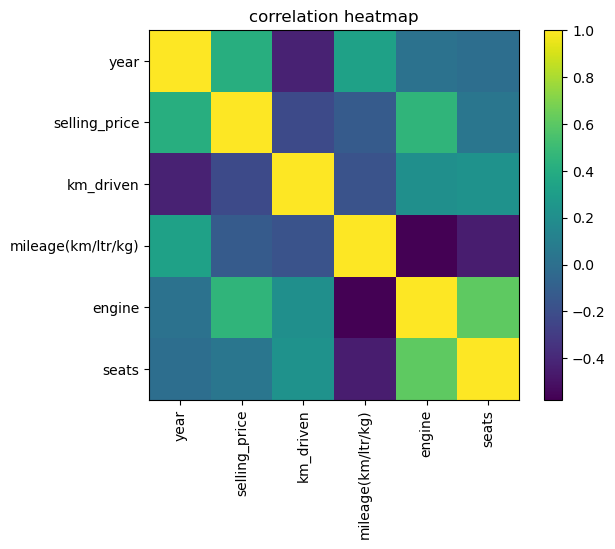

In [6]:
# correlation heatmap (for regression analysis)
plt.figure()
correlation_matrix = df[numeric_cols].corr()

plt.imshow(correlation_matrix)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("correlation heatmap")
plt.colorbar()
plt.show()

In [7]:

# show correlation with target variable
print("\ncorrelation with target (selling_price):")
print(correlation_matrix["selling_price"].sort_values(ascending=False))


correlation with target (selling_price):
selling_price         1.000000
engine                0.455682
year                  0.412302
seats                 0.041617
mileage(km/ltr/kg)   -0.126280
km_driven            -0.222158
Name: selling_price, dtype: float64


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage(km/ltr/kg)            7906 non-null   float64
 4   engine                        7906 non-null   float64
 5   max_power                     7906 non-null   float64
 6   seats                         7906 non-null   float64
 7   fuel_Diesel                   7906 non-null   bool   
 8   fuel_LPG                      7906 non-null   bool   
 9   fuel_Petrol                   7906 non-null   bool   
 10  seller_type_Individual        7906 non-null   bool   
 11  seller_type_Trustmark Dealer  7906 non-null   bool   
 12  transmission_Manual           7906 non-null   bool   
 13  owner_Fo

# Part B

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
X = df[['engine']]
y = df[['selling_price']]

print(f"\nDataset size: {len(df)} samples")


Dataset size: 7906 samples


In [11]:
# Feature scaling

X = X/X.max()
X = X.values.flatten()

y = y/y.max()
# y = y.values.flatten()
y = y.values.reshape(-1, 1)


In [12]:
# Adding 1's column to X so that we can do matrix multiplication, this will basically represent the variable attached with the intercept
# y = mx + cz (z=1 here, and that is what this column will be)

n_rows = len(y)
X = np.c_[np.ones(n_rows), X]
print(X)

# This will hold our final thetas, intercept and slope
theta = np.zeros((2, 1))

[[1.         0.34628191]
 [1.         0.41564928]
 [1.         0.41537181]
 ...
 [1.         0.34628191]
 [1.         0.38734739]
 [1.         0.38734739]]


In [13]:
# Actual loop
epochs = 80000
learning_rate = 0.01
m = n_rows # No. of rows
costs = []

for i in range(epochs):
    h = X @ theta

    error = h - y
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X.T @ error)

    # Updating theta now
    theta = theta - learning_rate * gradient

print(gradient)

[[ 2.51405060e-09]
 [-6.10734211e-09]]


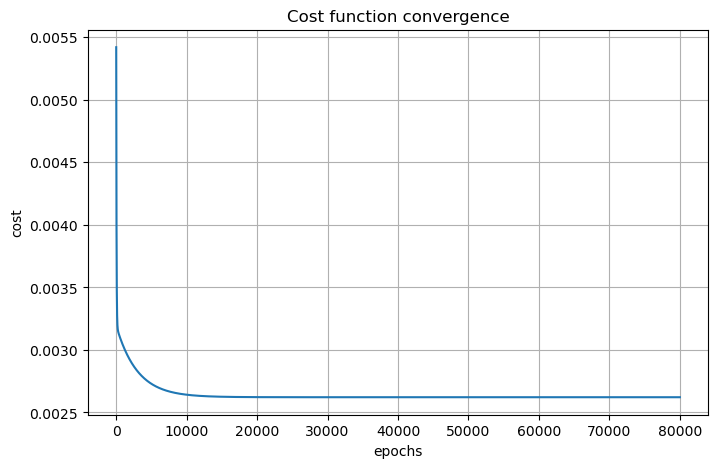

In [14]:
# Plotting epochs vs cost function
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

Slope = 0.265
Intercept = -0.042


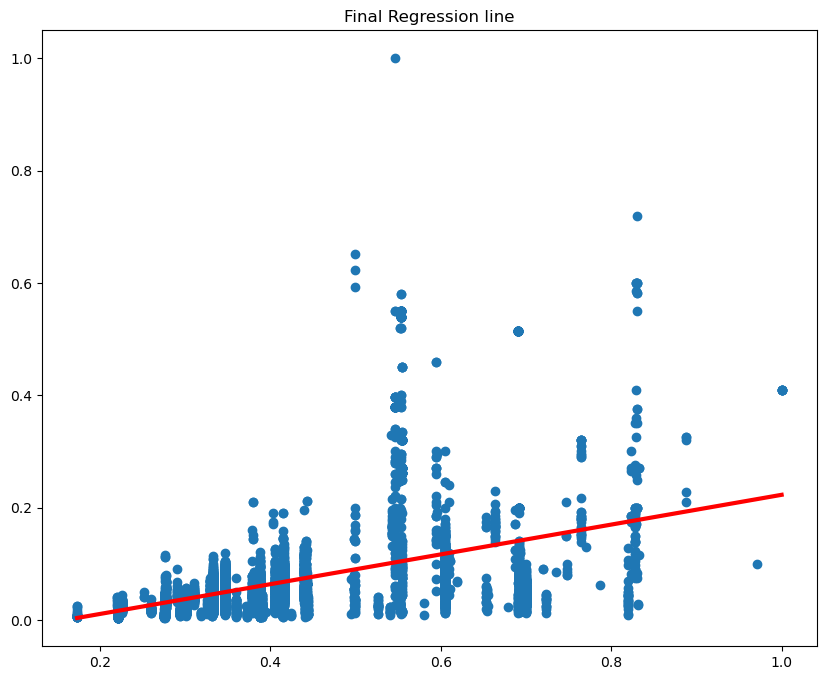

In [15]:
# The actual regression line
plt.figure(figsize=(10,8))

line_x = np.linspace(min(X[:, 1]), max(X[:, 1]), 300)
line_y = theta[0].item() + theta[1].item() * line_x

plt.scatter(X[:, 1], y)
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.title('Final Regression line')

slope = (line_y[1] - line_y[0])/(line_x[1] - line_x[0])
print(f'Slope = {slope:.03f}')
print(f'Intercept = {theta[0].item():.3f}')

plt.show()

# Part C

In [16]:
X = df.drop(['selling_price'], axis=1)
y = df[['selling_price']]

In [17]:
# Feature scaling
X_original = X.copy()  # Keep original for coefficient interpretation
X_max = X.max()
y_max = y.max()

X = X / X_max
X = X.values

y = y / y_max
y = y.values.reshape(-1, 1)

In [18]:
np.random.seed(42)
p = np.random.permutation(len(y))
split = int(0.8 * len(y))
print(p)
X_train, X_test = X[p[:split]], X[p[split:]]
y_train, y_test = y[p[:split]], y[p[split:]]
print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")


[3641 5531 3524 ...  860 7603 7270]
Training samples: 6324 | Test samples: 1582


In [ ]:
# Adding 1's column for intercept
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize theta - 1 intercept + all features
n_features = X_train.shape[1]
theta = np.zeros((n_features, 1))
print(f"\nInitialized theta with {n_features} parameters")

In [41]:
# Gradient descent (training on training set only)
epochs = 500
learning_rate = 0.01
m = len(y_train)
costs = []

for i in range(epochs):
    h = X_train @ theta
    error = h - y_train
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X_train.T @ error)
    theta = theta - learning_rate * gradient

print(f"Final theta: {theta.flatten()}")

Final theta: [np.float64(0.02145906572150996) np.float64(0.027667208117760925)
 np.float64(-0.0533340856815102) np.float64(0.06302394751910023)
 np.float64(0.0996415391684841) np.float64(0.30671223687125093)
 np.float64(-0.04858741210028463) np.float64(-0.0011562495693242672)
 np.float64(0.007164542260442432) np.float64(-0.005574572531386691)
 np.float64(-0.0357783907041998) np.float64(-0.04641770218152628)
 np.float64(-0.07242057700453057) np.float64(-0.02409330988211198)
 np.float64(-0.017751845627741018) np.float64(0.04404269830986384)
 np.float64(-0.021885187789217126)]


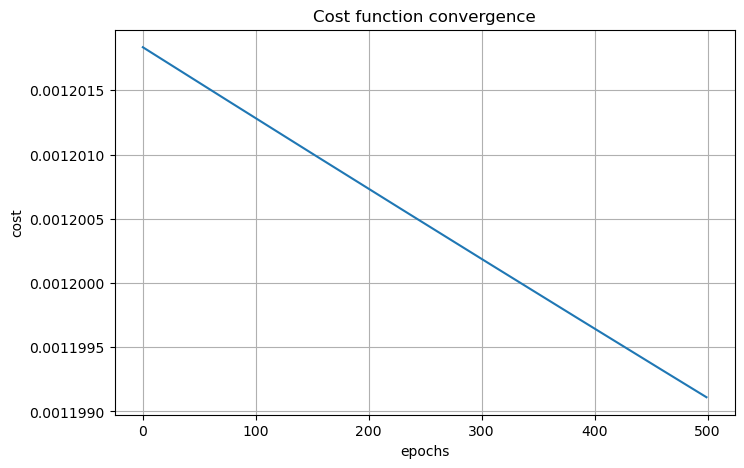

In [42]:
# Cost convergence plot
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### Coefficients

In [43]:
column_names = X_original.columns.tolist()
for i, value in enumerate(theta.flatten()):
    label = " (Intercept)" if i == 0 else f" ({column_names[i-1]})"
    print(f"theta_{i} = {value:12.6f} {label}")

theta_0 =     0.021459  (Intercept)
theta_1 =     0.027667  (year)
theta_2 =    -0.053334  (km_driven)
theta_3 =     0.063024  (mileage(km/ltr/kg))
theta_4 =     0.099642  (engine)
theta_5 =     0.306712  (max_power)
theta_6 =    -0.048587  (seats)
theta_7 =    -0.001156  (fuel_Diesel)
theta_8 =     0.007165  (fuel_LPG)
theta_9 =    -0.005575  (fuel_Petrol)
theta_10 =    -0.035778  (seller_type_Individual)
theta_11 =    -0.046418  (seller_type_Trustmark Dealer)
theta_12 =    -0.072421  (transmission_Manual)
theta_13 =    -0.024093  (owner_Fourth & Above Owner)
theta_14 =    -0.017752  (owner_Second Owner)
theta_15 =     0.044043  (owner_Test Drive Car)
theta_16 =    -0.021885  (owner_Third Owner)


### MSE, RMSE, R2

In [44]:
def evaluate_model(X, y, theta, y_max, label):
    # 1. Predictions and Rescaling
    y_max_val = y_max.item() if hasattr(y_max, 'item') else y_max
    y_pred = (X @ theta) * y_max_val
    y_true = y * y_max_val
    
    # 2. Calculate Metrics
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    
    # 3. R-Squared calculation
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # 4. Print results
    print(f"\n--- {label} METRICS ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²:   {r2:.4f} ({r2*100:.2f}%)")
    
    # RETURN EVERYTHING: metrics + the actual arrays for plotting
    return rmse, r2, y_true, y_pred

# Now you can evaluate both in just two lines:
rmse_train, r2_train, y_actual_train, y_pred_train = evaluate_model(X_train, y_train, theta, y_max, "TRAINING")
rmse_test, r2_test, y_actual_test, y_pred_test = evaluate_model(X_test, y_test, theta, y_max, "TEST")

# Simple comparison
print(f"\nGeneralization Gap (R²): {(r2_train - r2_test)*100:.2f}%")


--- TRAINING METRICS ---
RMSE: 489,715.22
R²:   0.6325 (63.25%)

--- TEST METRICS ---
RMSE: 501,310.66
R²:   0.6403 (64.03%)

Generalization Gap (R²): -0.77%


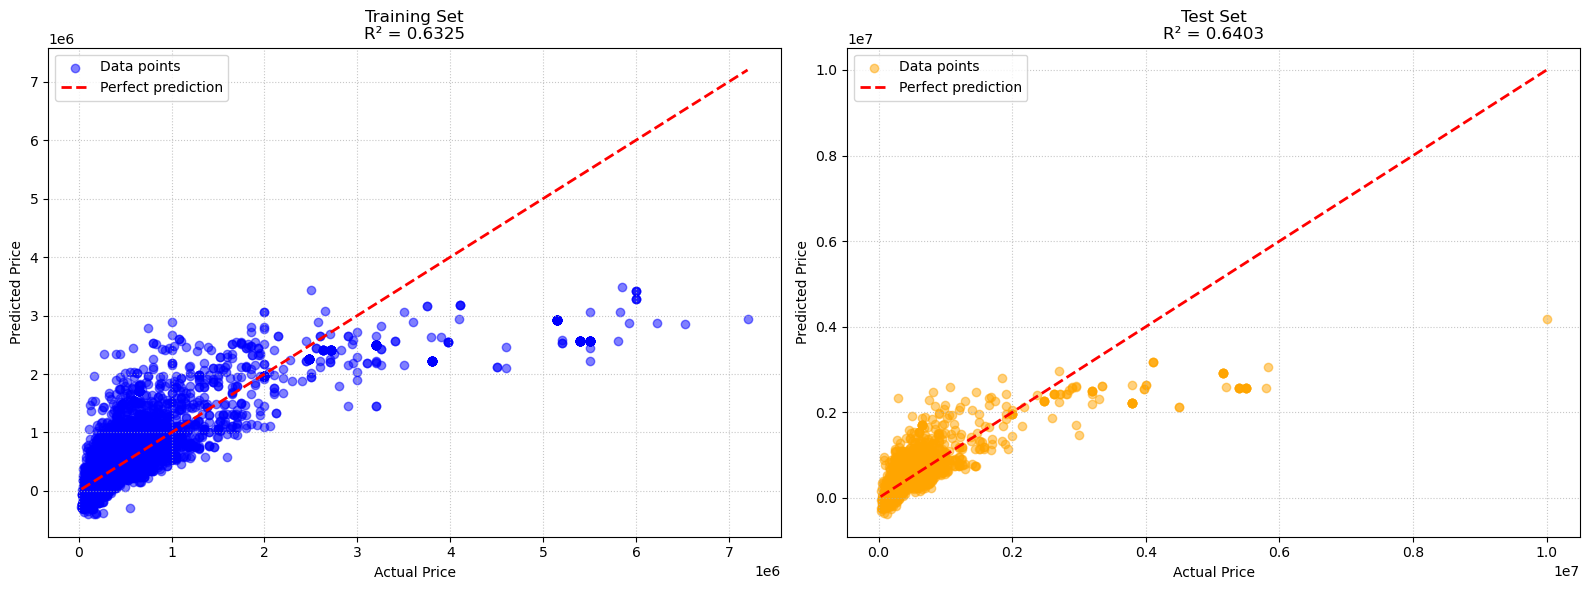

In [46]:
def plot_results(ax, y_true, y_pred, title, color, r2):
    # 1. Scatter plot of data
    ax.scatter(y_true, y_pred, alpha=0.5, color=color, label='Data points')
    
    # 2. Diagonal "Perfect Prediction" line
    limits = [y_true.min(), y_true.max()]
    ax.plot(limits, limits, 'r--', linewidth=2, label='Perfect prediction')
    
    # 3. Formatting
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{title}\nR² = {r2:.4f}')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()

# Main Plotting Code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_results(ax1, y_actual_train, y_pred_train, "Training Set", "blue", r2_train)
plot_results(ax2, y_actual_test, y_pred_test, "Test Set", "orange", r2_test)

plt.tight_layout()
plt.show()

# Part D

In [66]:
X = df.drop(['selling_price'], axis=1)
y = df[['selling_price']]

### Adding features of higher power

In [67]:
X_num = df[['year', 'engine', 'max_power', 'km_driven']].values
X_squared = X_num**2
X_final = np.hstack((X.values, X_squared))
X = X_final

In [68]:
# Feature scaling
X_original = X.copy()  # Keep original for coefficient interpretation
X_max = X.max()
y_max = y.max()

X = X / X_max
# X = X.values

y = y / y_max
y = y.values.reshape(-1, 1)

In [69]:
np.random.seed(42)
p = np.random.permutation(len(y))
split = int(0.8 * len(y))
print(p)
X_train, X_test = X[p[:split]], X[p[split:]]
y_train, y_test = y[p[:split]], y[p[split:]]
print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")

[3641 5531 3524 ...  860 7603 7270]
Training samples: 6324 | Test samples: 1582


In [70]:
# Adding 1's column for intercept
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize theta - 1 intercept + all features
n_features = X_train.shape[1]
theta = np.zeros((n_features, 1))
print(f"\nInitialized theta with {n_features} parameters")


Initialized theta with 21 parameters


In [71]:
# Gradient descent (training on training set only)
epochs = 500
learning_rate = 0.01
m = len(y_train)
costs = []

for i in range(epochs):
    h = X_train @ theta
    error = h - y_train
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X_train.T @ error)
    theta = theta - learning_rate * gradient

print(f"Final theta: {theta.flatten()}")

Final theta: [0.06430290834967126 2.3358542995465195e-11 -1.160705473760702e-10
 1.8492966357246322e-13 3.353326490797851e-11 2.980032979375474e-12
 6.557495111757547e-14 1.3642415239803371e-14 -1.165799790233146e-16
 -1.85904440939475e-15 -1.0866581712484309e-15 7.608819043735737e-16
 -4.500453340026137e-15 -5.026753794304358e-16 -2.7036344193047332e-15
 2.756518181002192e-16 -1.2972374492736088e-15 4.727622092923808e-08
 8.482595844608333e-08 6.135585999435296e-10 -4.269503196221198e-05]


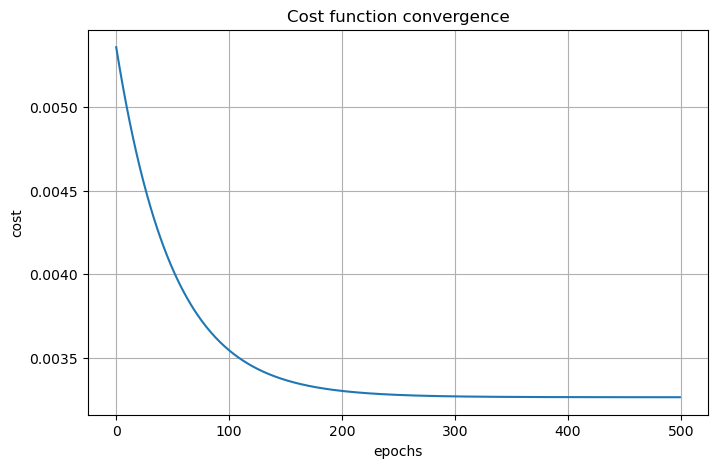

In [72]:
# Cost convergence plot
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### Coefficients

In [73]:
column_names = X_original.columns.tolist()
for i, value in enumerate(theta.flatten()):
    label = " (Intercept)" if i == 0 else f" ({column_names[i-1]})"
    print(f"theta_{i} = {value:12.6f} {label}")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### MSE, RMSE, R2

In [74]:
def evaluate_model(X, y, theta, y_max, label):
    # 1. Predictions and Rescaling
    y_max_val = y_max.item() if hasattr(y_max, 'item') else y_max
    y_pred = (X @ theta) * y_max_val
    y_true = y * y_max_val
    
    # 2. Calculate Metrics
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    
    # 3. R-Squared calculation
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # 4. Print results
    print(f"\n--- {label} METRICS ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²:   {r2:.4f} ({r2*100:.2f}%)")
    
    # RETURN EVERYTHING: metrics + the actual arrays for plotting
    return rmse, r2, y_true, y_pred

# Now you can evaluate both in just two lines:
rmse_train, r2_train, y_actual_train, y_pred_train = evaluate_model(X_train, y_train, theta, y_max, "TRAINING")
rmse_test, r2_test, y_actual_test, y_pred_test = evaluate_model(X_test, y_test, theta, y_max, "TEST")

# Simple comparison
print(f"\nGeneralization Gap (R²): {(r2_train - r2_test)*100:.2f}%")


--- TRAINING METRICS ---
RMSE: 807,852.24
R²:   -0.0000 (-0.00%)

--- TEST METRICS ---
RMSE: 835,984.73
R²:   -0.0004 (-0.04%)

Generalization Gap (R²): 0.04%


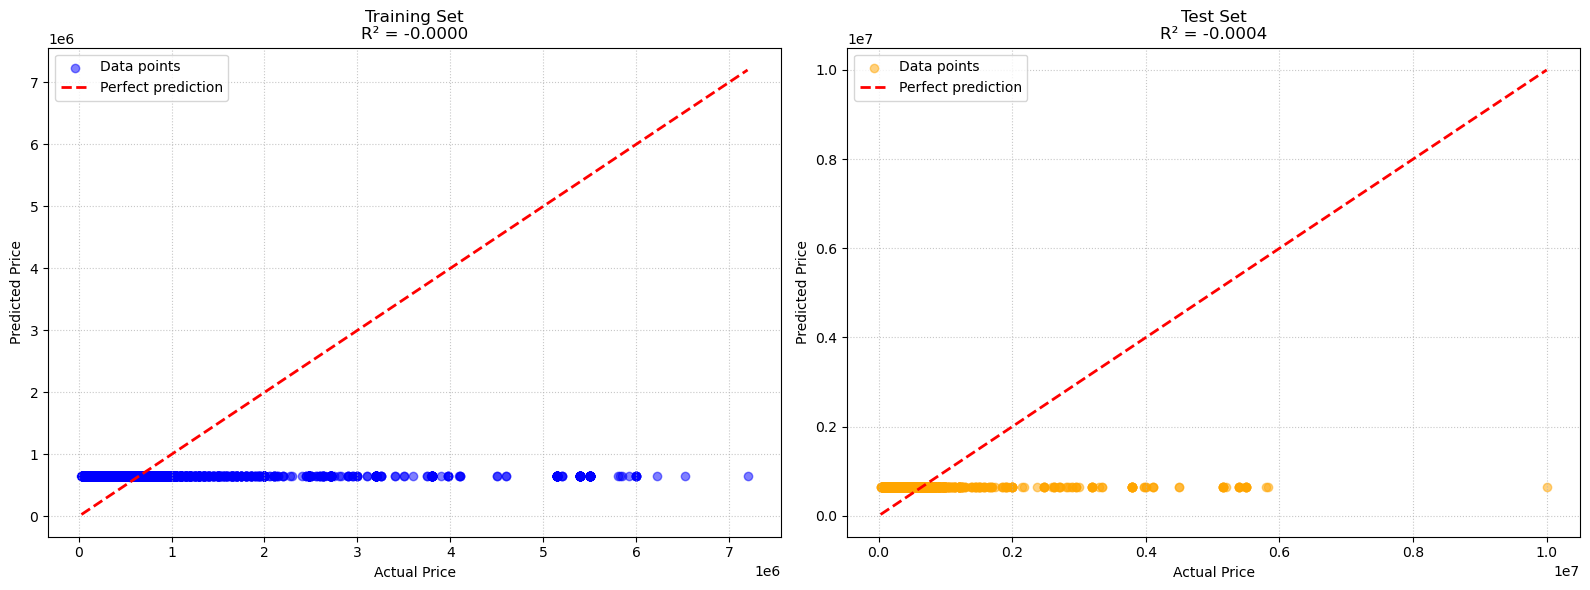

In [75]:
def plot_results(ax, y_true, y_pred, title, color, r2):
    # 1. Scatter plot of data
    ax.scatter(y_true, y_pred, alpha=0.5, color=color, label='Data points')
    
    # 2. Diagonal "Perfect Prediction" line
    limits = [y_true.min(), y_true.max()]
    ax.plot(limits, limits, 'r--', linewidth=2, label='Perfect prediction')
    
    # 3. Formatting
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{title}\nR² = {r2:.4f}')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()

# Main Plotting Code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_results(ax1, y_actual_train, y_pred_train, "Training Set", "blue", r2_train)
plot_results(ax2, y_actual_test, y_pred_test, "Test Set", "orange", r2_test)

plt.tight_layout()
plt.show()